## Task 1-Using Supervised ML:Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the numbers of hours they have studied. This is a simple linear regression task as there are two variables (x and y).  

## Importing the libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette = 'twilight_r') #setting the theme for the plots

## Importing the Dataset and Exploring it

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Data is imported.")

Data is imported.


In [3]:
data.shape

(25, 2)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


After exploring our dataset we can plot a graph to visualize any relationship between the data by creating the graph with the below script.

## Plotting the graph

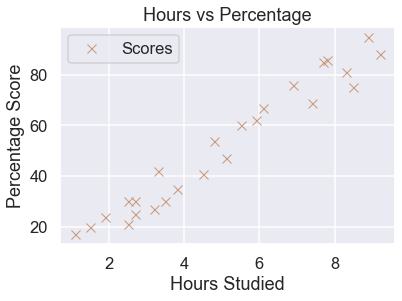

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


In the above graph it can be observed that there is a positive linear relationship between the number of hours studied and percentage of scores.

## Preparing the Data

The data is then divided into 'attributes' and 'labels'.

In [8]:
#Preparing the data 
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

After having the attributes and labels, the next step is to split the dataset into training and test sets by using Scikit-Learn's built in train_test_split() method.

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

## Training the Simple Linear Regression model on the training set

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)


LinearRegression()

In [11]:
print(regressor.intercept_)#To retrieve the intercept

2.0181600414346974


In [12]:
print(regressor.coef_)#For retrieving the slope (coefficient of x)


[9.91065648]


## Visualizing the training dataset results

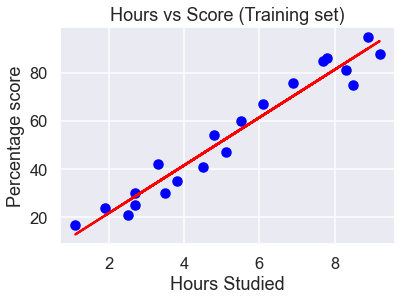

In [13]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()


## Predicting the Test set results

In [14]:
pred= regressor.predict(x_test)
print(y_test[0:5], '\n', pred[0:5])

[20 27 69 30 62] 
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting the score if a student studies for 9.25 hours

In [16]:
m = regressor.predict([[9.25]])
print('Predicted score if a student study for 9.25 hrs in a day:',m)

Predicted score if a student study for 9.25 hrs in a day: [93.69173249]


## Evaluating the model

The final step is to evaluate to model. In this step we compare how different alogrithms perform on a particular dataset. 

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


The value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.

In [19]:
regressor.score(x,y)
#The value of R squared is close to 1. Therefore, it is a good model.

0.9526947647057274